# Neural Network Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# TENSORFLOW
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

### One Hot Encoding

In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:
X = df.drop(columns='Exited')
y = df['Exited']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)
X_train.shape,y_test.shape

((8000, 11), (2000,))

In [14]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training Neural Network

In [15]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'relu'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 1.0498 - accuracy: 0.7658 - val_loss: 0.6708 - val_accuracy: 0.7856
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.7889 - val_loss: 0.5152 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7942 - val_loss: 0.4606 - val_accuracy: 0.8050
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.8027 - val_loss: 0.4394 - val_accuracy: 0.8100
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7972 - val_loss: 0.4715 - val_accuracy: 0.7994
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7831 - val_loss: 0.4843 - val_accuracy: 0.8012
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8053 - val_loss: 0.4639 - val_accuracy: 0.8106

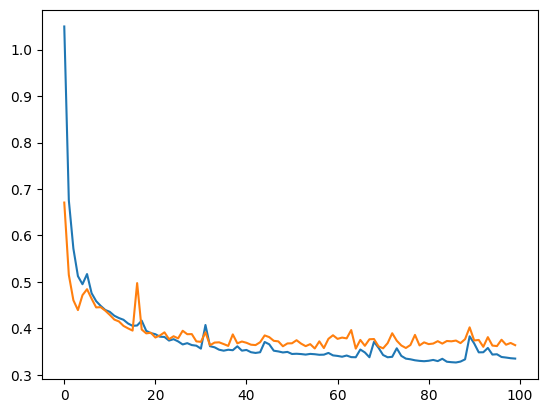

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

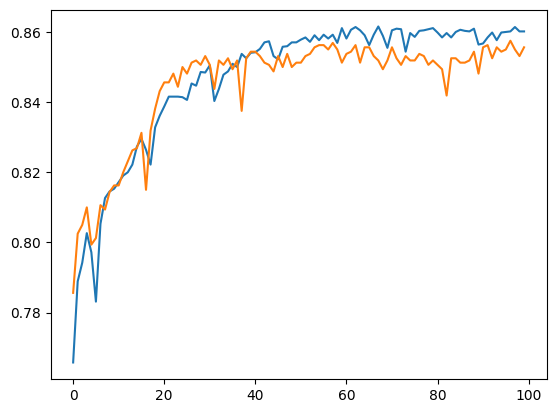

In [41]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])



<AxesSubplot: >

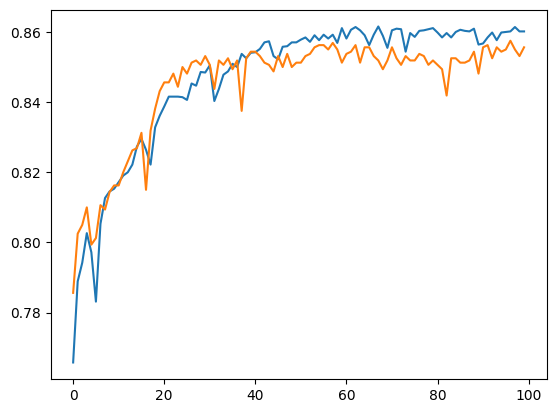

In [31]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])

In [21]:
model.layers[0].get_weights()

[array([[ 0.13941365, -0.4753716 , -0.00891182, -0.14267536,  0.38660702,
          0.17994443,  0.16611506,  0.09934139, -0.01610415, -0.26570985,
          0.37867224],
        [ 0.2707708 , -0.13742916,  0.58325344,  0.66560125, -0.30961263,
         -0.16322729,  0.7057377 ,  0.5293556 ,  0.46917015,  0.4831081 ,
         -0.24873498],
        [-0.4514027 ,  0.06791726, -0.06115985,  0.09458604, -0.34175465,
          0.5476503 , -0.00942068,  0.09895419, -0.32251853, -0.10632247,
          0.41156277],
        [ 0.1486258 ,  0.26888603,  0.07865435, -0.194996  ,  0.31134176,
          0.21120803,  0.134437  , -0.00578756, -0.5121768 ,  0.22704959,
          0.4543834 ],
        [-0.39935356, -0.07168692,  0.8643671 , -0.37370828, -0.5906999 ,
          0.4873098 , -0.44372573,  0.0050655 , -0.61070883,  0.7904255 ,
          0.5118452 ],
        [-0.13162069,  0.0023865 , -0.06661666,  0.21787998, -0.2891585 ,
         -0.47247225, -0.07391667,  0.12273611, -0.20514357,  0.1330440

In [22]:
model.layers[1].get_weights()


[array([[ 1.43646235e-02,  1.38256043e-01, -5.63642271e-02,
         -3.51191998e-01, -3.20022285e-01,  4.27326113e-01,
         -1.53459772e-01,  2.47241706e-01, -4.19253409e-01,
          1.20603770e-01, -4.45961624e-01],
        [ 1.69286519e-01, -3.72062415e-01, -1.44885138e-01,
          1.44195363e-01, -6.16463363e-01, -1.03357844e-01,
          1.97866419e-03,  1.64694324e-01,  2.79921234e-01,
         -4.17972922e-01, -3.57342921e-02],
        [-3.81465591e-02,  2.47773007e-02,  6.54980361e-01,
         -6.65508211e-01,  5.18169880e-01, -4.94016195e-03,
          1.52896672e-01,  3.25795144e-01,  1.21445425e-01,
         -4.81950581e-01,  4.74351421e-02],
        [-1.69667363e-01, -6.56065404e-01,  1.40053019e-01,
          3.83198410e-01,  2.62441695e-01,  9.66132358e-02,
          3.81399207e-02, -9.98824909e-02, -2.28931889e-01,
         -5.44761240e-01, -5.27006865e-01],
        [-5.11635616e-02, -1.13371499e-01,  2.91426212e-01,
          1.94237024e-01,  3.40018310e-02, -

In [23]:
y_pred_sigmoid = model.predict(X_test_scaled)

63/63 [==============================] - 0s 888us/step


In [24]:
y_pred = np.where(y_pred_sigmoid>0.5,1,0)

In [42]:
accuracy_score(y_test,y_pred)

0.8645